<a href="https://colab.research.google.com/github/tufts-mathmodeling/HW/blob/master/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Python for Math Modeling

Welcome to Homework Zero!  This is just for messing around with templated functions-- you're not expected to be able to write functions like this on your own.  

Things to get comfortable with
* Jupyter-style notebooks — running cells, etc. 
* Basic Python syntax (see many links below)
  * `print()` statements
  * Basic math
  * Variables
  * Functions
* Vectors, matrices, basic operations
* Plotting with Matplotlib (+ Seaborn)



## Resources
* Python
  * [DataCamp's interactive Intro to Python tutorial](https://www.learnpython.org/)
  * [Python for Everybody (University of Michigan MOOC)](https://www.py4e.com/lessons)
  * [A short Python and NumPy tutorial (Stanford CS231)](http://cs231n.github.io/python-numpy-tutorial/)
  * [Official Python tutorial](https://docs.python.org/3/tutorial/index.html)
* NumPy
  * [Introduction to NumPy (chapter 2 of VanderPlas' *Python Data Science Handbook*)](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html)
  * [NumPy reference guide](https://docs.scipy.org/doc/numpy/reference/)
* Matplotlib
  * [Official Pyplot tutorial (short)](https://matplotlib.org/tutorials/introductory/pyplot.html)
  * [Visualization with Matplotlib (chapter 4 of VanderPlas' *Python Data Science Handbook*)](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
  * [Gallery of Matplotlib examples](https://matplotlib.org/gallery/index.html)

In [0]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-white')
from scipy.misc import derivative
import sympy as sp

## Manipulating vectors and matrices with NumPy
Key points:
* Out of the box, Python is a general-purpose programming language that is poorly suited to scientific computing tasks—it's just too slow! The same design decisions (most notably dynamic typing) that make Python easy to use compared to languages such as C++ cause a lot of overhead. In general, numerical algorithms implemented naïvely in Python are a few orders of magnitude slower than the C++ equivalents.
* NumPy is a Python library that offers rich support for manipulating arrays of numbers in Python without the usual performance penalties.
* The NumPy API allows you to write vectorized code that is agnostic to whether the objects being manipulated are scalars or vectors.

### NumPy vectors (1D arrays)

In [114]:
# make a vector of length ten consisting of zeros
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [115]:
# make a vector of length ten consisting of ones and call it y.  The second line tells it to print y.
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [116]:
# the entries of y are y[0] followed by y[1] etc etc.  Here I'll tell it to overwrite the y[1] entry, replacing the contents with 2.  Then I'll print the result.
y[1] = 2
y

array([1., 2., 1., 1., 1., 1., 1., 1., 1., 1.])

In [117]:
# can you see which entries I am overwriting?
y[2:5] = 3
y

array([1., 2., 3., 3., 3., 1., 1., 1., 1., 1.])

### Vectorized arithmetic

In [118]:
# define a new thing by adding 1 to each entry
y_added = y + 1
y_added

array([2., 3., 4., 4., 4., 2., 2., 2., 2., 2.])

In [119]:
# similar
y_divided = y / 2
y_divided

array([0.5, 1. , 1.5, 1.5, 1.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [120]:
# more componentwise vector arithmetic
z = 2 * (y_added + y_divided)
z

array([ 5.,  8., 11., 11., 11.,  5.,  5.,  5.,  5.,  5.])

### Basic functions on arrays

In [121]:
# do stuff to a list of numbers
heights = np.array([68, 67, 63, 60, 58.5, 72])
print('average height:', np.mean(heights), 'in.')
print('shortest person is', np.min(heights), 'in. tall')
print('tallest person is', np.max(heights), 'in. tall')
print('the median person is', np.median(heights), 'in. tall')
print('the sum of the heights is', np.sum(heights), 'in.')

average height: 64.75 in.
shortest person is 58.5 in. tall
tallest person is 72.0 in. tall
the median person is 65.0 in. tall
the sum of the heights is 388.5 in.


### Random numbers

In [122]:
# Draw 10 numbers uniformly from the interval [0, 1).
uniform_random = np.random.random(10) 
uniform_random

array([0.34601221, 0.63497762, 0.50022891, 0.05461077, 0.76707694,
       0.39623014, 0.13022385, 0.86558863, 0.46892235, 0.21928543])

In [123]:
# Draw 10 normally distributed random numbers.
normal_random = np.random.randn(10)
normal_random

array([-0.92069353, -0.84513036,  0.31225163,  1.21941748,  0.90749585,
        1.4088859 , -1.02901373, -0.77715937, -0.25206373, -0.71873976])

### NumPy matrices (2D arrays)

In [124]:
# a 5x5 matrix of zeros.  We're using numpy here, which means everything is handled numerically not symbolically.
grid = np.zeros((5, 5))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [125]:
# remember that indexing starts at 0.  What is in the 0,0 position?
grid[0, 0]

0.0

In [126]:
# overwrite and display new values
grid[0, 0] = 1
grid[1, 0] = 2
grid

array([[1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [127]:
# row
grid[0]

array([1., 0., 0., 0., 0.])

In [128]:
# column (weird syntax I know)
grid[:, 0]

array([1., 2., 0., 0., 0.])

In [129]:
# entrywise arithmetic
(2 * grid) + 1

array([[3., 1., 1., 1., 1.],
       [5., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [130]:
# here's one way of doing matrix times vector
v = np.array([3, 0, 0, 0, 0])
v
grid @ v

array([3., 6., 0., 0., 0.])

In [131]:
# and here's another
np.dot(grid, v)

array([3., 6., 0., 0., 0.])

In [132]:
# and another
grid @ np.array([2,1,1,1,1])

array([2., 4., 0., 0., 0.])

# Plotting with Matplotlib

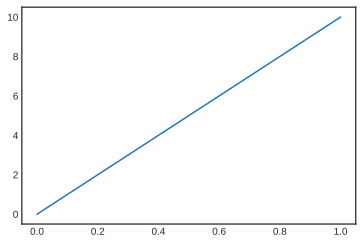

In [133]:
# I'm telling it to run through these x values while running through those y values.  The result is a line.
plt.plot([0, 1], [0, 10])
plt.show()

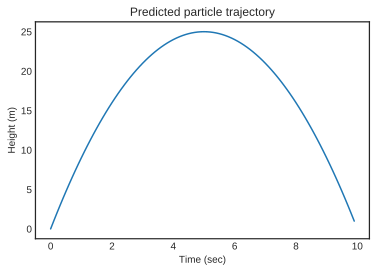

In [134]:
# I'm telling it to let t range from here to there in increments of that.  height depends on t, and then I plot the x values and y values.
t = np.arange(0, 10, 0.1)
height = -t**2 + 10*t
plt.plot(t, height)
plt.xlabel('Time (sec)')
plt.ylabel('Height (m)')
plt.title('Predicted particle trajectory')
plt.show()

## Scatter plots

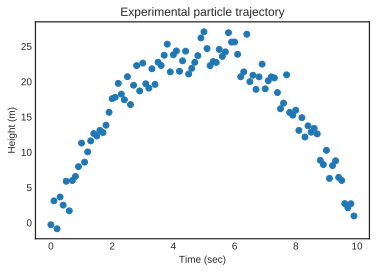

In [135]:
# I'm making my own random noise by adding a small random variable.
noisy_height = height + 2 * np.random.randn(height.size)
plt.scatter(t, noisy_height)
plt.xlabel('Time (sec)')
plt.ylabel('Height (m)')
plt.title('Experimental particle trajectory')
plt.show()

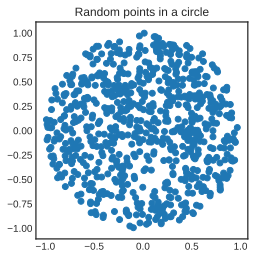

In [136]:
# This example has advanced syntax.  Poke around carefully if you're interested!  Otherwise just admire the pretty picture.
points =  2 * np.random.random((1000, 2)) - 1
points_in_circle = points[(points[:, 0]**2 + points[:, 1]**2) <= 1]

_, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(points_in_circle[:, 0], points_in_circle[:, 1])
plt.title('Random points in a circle')
plt.show()

### Mixing and matching

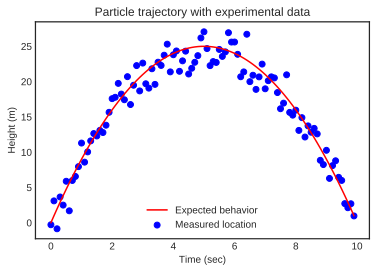

In [137]:
# I can plot more than one thing on the same plot.
plt.scatter(t, noisy_height, label='Measured location', color='blue')
plt.plot(t, height, label='Expected behavior', color='red')
plt.xlabel('Time (sec)')
plt.ylabel('Height (m)')
plt.title('Particle trajectory with experimental data')
plt.legend(loc='lower center')
plt.show()

### Histograms

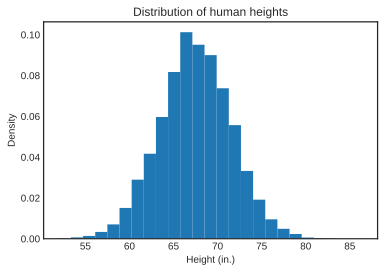

In [138]:
# Here I'm actually constructing a normal distribution and calling it "human heights" for illustrative purposes.  
#It is true though that heights (and lots of other things) tend to be normally distributed on appropriate sub-populations.
random_heights = 67.5 + 4 * np.random.randn(10000)
plt.hist(random_heights, bins=25, density=True)
plt.title('Distribution of human heights')
plt.xlabel('Height (in.)')
plt.ylabel('Density')
plt.show()

### Contour plots

[(see "Density and Contour Plots")](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html)

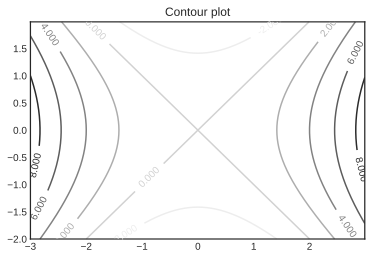

In [139]:
# Here's a basic contour plot showing level sets of the function x^2-y^2.  Play around with the function and re-run to get new pictures!
delta = 0.01
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot')
plt.show()

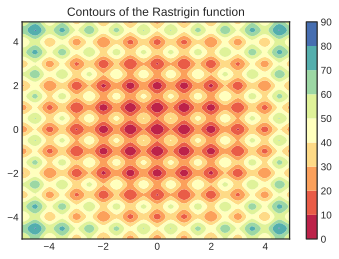

In [140]:
# more advanced: here's a funky little function of two variables with lots of peaks and wells, plotted in a more colorful way.
def rastrigin(x, y, A=10):
    return (2 * A) + ((x ** 2) - (A * np.cos(2 * np.pi * x))) + \
           ((y ** 2) - (A * np.cos(2 * np.pi * y)))
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)
plt.contourf(X, Y, Z, 8, cmap='Spectral')
plt.colorbar()
plt.title('Contours of the Rastrigin function')
plt.show()

### 3D plots
[(see "Three-Dimensional Plotting in Matplotlib")](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

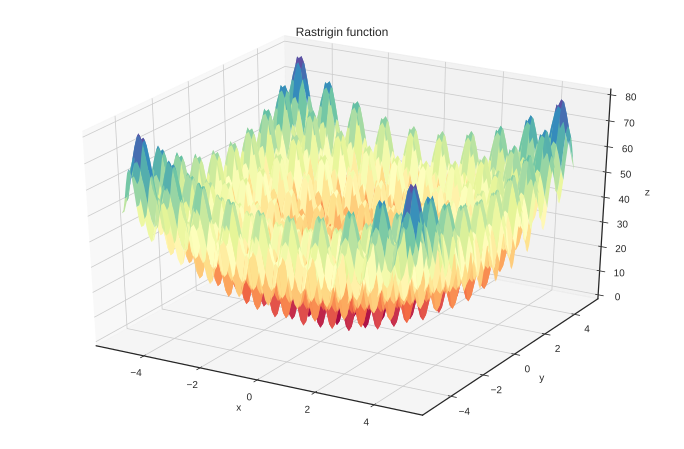

In [141]:
# this remembers X,Y,Z from above and plots the Rastrigin function.  Can you get it to plot the x^2-y^2 function?   
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='Spectral')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Rastrigin function')
plt.show()

# Function manipulation
Define a function of one or several variables, both numerically (numpy) and symbolically (sympy)

In [147]:
# here we define some functions related to the oil spill problem from class.  play around with it and see if you agree that t is defined correctly in terms of n.
# the cost C depends on t, and you can write it with the fine or without. 
# at the bottom, we're taking a derivative.  These calculations are numerical, so we have to tell it how precise to be (that's the dx specification) and the answer is only approximate. 
# I'm plugging in n=11,12,13.  Why am I using CFfunction instead of CnFfunction?
def tfunction( n ):
  return 280/(n+1) 
def CFfunction( n ):
  return 500*tfunction(n)+n*(18000+tfunction(n)*800)+10000*(tfunction(n)-14)
def CnFfunction( n ):
  return 500*tfunction(n)+n*(18000+tfunction(n)*800)
print(CFfunction(10),CFfunction(11),CFfunction(12))
print(derivative(CFfunction,10,dx=1e-6),derivative(CFfunction,11,dx=1e-6),derivative(CFfunction,12,dx=1e-6))

510909.0909090909 508333.3333333333 508923.076923077
-4446.281032869592 -861.1110388301313 1928.9940828457475


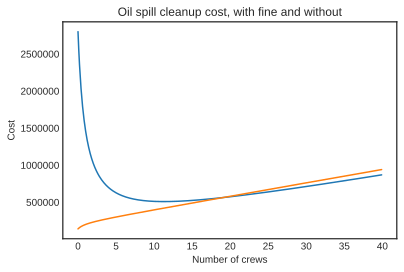

In [143]:
# Here I'm plotting both.  So what is the actual cost at each n value?
n = np.arange(0, 40, 0.1)
plt.plot(n, CFfunction(n))
plt.plot(n, CnFfunction(n))
plt.xlabel('Number of external crews')
plt.ylabel('Cost')
plt.title('Oil spill cleanup cost, with fine and without')
plt.show()

In [144]:
# All of the above calculations were done numerically, meaning just by plugging in numbers cleverly.
# Suppose you want to take a derivative symbolically, arriving at a general formula.  Above, we imported the library sympy as sp
x = sp.Symbol('x')
y = sp.Symbol('y')
n = sp.Symbol('n')
sp.diff(500*280/(n+1))

-140000/(n + 1)**2

In [145]:
# for this function of two variables, this is the derivative with respect to x
print(sp.diff(x*y+x**2,x))
# this time we are first taking the derivative with respect to x, then y
sp.diff(x*y+x**2,x,y)

2*x + y


1